# Домашнее задание 4

Вам предстоит поработать с данными про отток клиентов банка и построить визуализации для них, отражающие те или иные закономерности.

Описание признаков:

* RowNumber - номер строки таблицы
* CustomerId - идентификатор клиента
* Surname - фамилия клиента
* CreditScore - кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography - страна, из которой клиент (банк межнациональный)
* Gender - пол клиента
* Age - возраст клиента
* Tenure - сколько лет клиент пользуется банком
* Balance - сколько у клиента денег на счетах в банке
* NumOfProduct - число услуг банка, которые приобрел клиент
* HasCrCard - есть ли у клиента кредитная карта (1 - да, 0 - нет)
* IsActiveMember - есть ли у клиента статус активного участника банка (1 - да, 0 - нет)
* EstimatedSalary - предполагаемая заработная плата клиента
* Exited - статус ушедшего (1 - ушедший клиент, 0 - лояльный клиент)


In [2]:
import pandas as pd
import numpy as np        
  
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
churn_data = pd.read_csv('churn.csv')
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Задание 1

Визуализируйте распределение баланса пользователей. Попробуйте использовать хотя бы два типа графиков для этого. Подпишите оси и добавьте название графика. По желанию добавьте дополнительное оформление (например, поменяйте цвета или размер шрифта). Напишите в отдельной ячейке в 2-3 предложения интерпретацию.

В основном баланс клиента банка составляет 120-140 тыс. Распредление баланса по полу равномерно.

Text(0.5, 1.0, 'Balance distribrution')

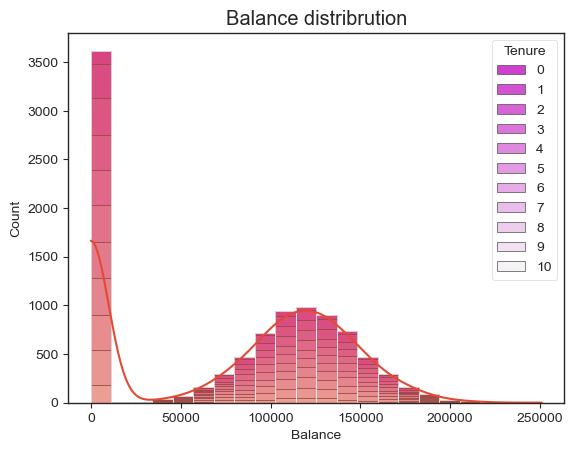

In [4]:
sns.set_style("ticks")
sns.histplot(
    churn_data,
    x="Balance", hue="Tenure",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
)
sns.histplot(churn_data['Balance'], kde = True);
plt.title('Balance distribrution')

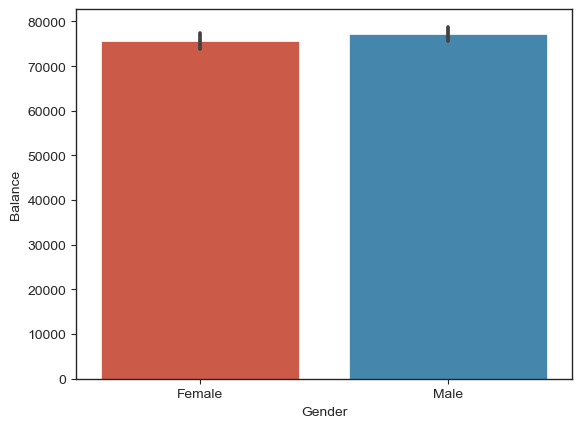

In [5]:
sns.barplot(x = 'Gender', y = 'Balance', data = churn_data);

## Задание 2

Постройте график, отражающий взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? По желанию добавьте дополнительное оформление (например, поменяйте цвета или размер шрифта). Напишите в отдельной ячейке в 1-2 предложения интерпретацию. Если не видите явной взаимосвязи, напишите об этом.

Text(0.5, 1.0, 'Estimated Salary vs. Credit Store')

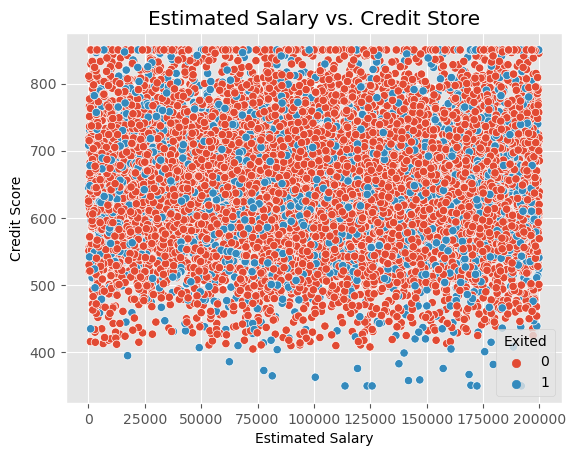

In [8]:
sns.scatterplot(x = 'EstimatedSalary', y = 'CreditScore', hue='Exited' ,data = churn_data);
plt.xlabel('Estimated Salary')
plt.ylabel('Credit Score')
plt.title('Estimated Salary vs. Credit Store')

## Задание 3

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. По желанию добавьте дополнительное оформление (например, поменяйте цвета или размер шрифта). Напишите в отдельной ячейке в 2-3 предложения интерпретацию.

Существует линейная зависимость между статусом активного участника банка и лояльностью клиента. Активные клиенты реже уходят из банка, чем клиент, не имеющие статус "активный клиент").

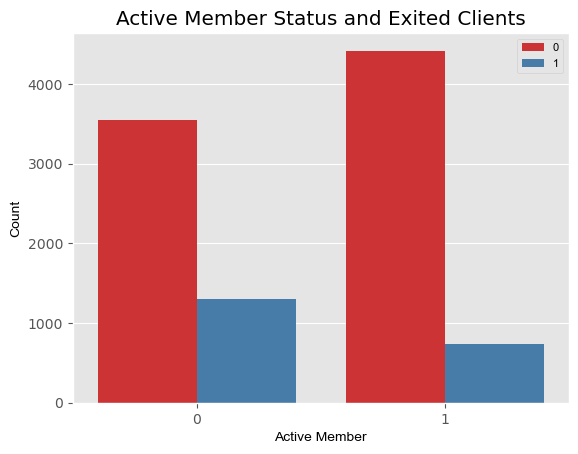

In [13]:
font_props = {'fontname': 'Arial', 'fontsize': '10'}
sns.countplot(x = 'IsActiveMember', hue='Exited' ,data = churn_data, palette = 'Set1');
plt.xlabel('Active Member', **font_props)
plt.ylabel('Count',**font_props)
plt.title('Active Member Status and Exited Clients')

plt.legend(prop={'family': 'Arial', 'size': 8})

## Задание 4

Сделайте интерактивную визуализацию по предложенным данным (статистика авиаперевозок).
Изобразите на ней перевозки в каждом году за каждый месяц, при этом используйте столбчатые диаграммы: один столбец — данные за один месяц в конкретном году. Одновременно на графике должны отображаться 12 столбцов для сравнения динамики за все годы в выбранный месяц. Выбор месяца организуйте, используя слайдер. 

Вы должны получить следующую визуализацию: 
1. слайдер имеет 12 позиций
2. позиции по месяцам (действительно, у нас всего 12 месяцев в каждом году)
3. для каждого месяца, в каждой позиции визуализировано 12 столбцов — измерения в указанном месяце по конкретным годам (там всего 12 лет).

In [15]:
df = pd.read_csv('hw_rt.csv')
df.head()

,Unnamed: 0,Дата,Кол-во пассажиров,Месяц,Год
0,0,1949-01-01,112,1,1949
1,1,1949-02-01,118,2,1949
2,2,1949-03-01,132,3,1949
3,3,1949-04-01,129,4,1949
4,4,1949-05-01,121,5,1949


Пример:

<a href="https://ibb.co/tPtTVvQ"><img src="https://i.ibb.co/Wpw4mMG/2023-03-23-170012.jpg" alt="2023-03-23-170012" border="0"></a>

In [24]:
import plotly
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
%matplotlib inline 
import plotly.express as px


fig = px.bar(df, x='Год', y='Кол-во пассажиров', color='Год', animation_frame='Месяц',
             labels={'Год': 'Год', 'Кол-во пассажиров': 'Кол-во пассажиров'},
             title='Количество перевозок в разных месяцах по годам',
             range_y=[0, max('Год')])

fig.update_layout(yaxis={'title': 'Кол-во пассажиров'},
                  legend={'title': 'Год'},
                  showlegend=False)
fig.show()